Попробуйте видоизменить параметры разобранной на уроке нейронной сети таким образом, чтобы улучшить её точность. Проведите анализ:
- Что приводит к ухудшению точности нейронной сети?
- Что приводит к увеличению её точности?

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from tqdm import tqdm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable

In [15]:
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# # преобразование массива в необходимый вид
# def from_one_hot(Y):
#     arr = np.zeros((len(Y), 1))

#     for i in range(len(Y)):
#         l = layer2[i]
#         for j in range(len(l)):
#             if(l[j] == 1):
#                 arr[i] = j+1
#     return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [16]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv('Iris.csv')
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
# g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [22]:
def calc_neural_network_accuracy(X_train, y_train, n_iterations=5000000, learning_rate=0.001):
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # процесс обучения
    for i in range(n_iterations): #100,000

        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)

        w1 += layer1.T.dot(layer2_delta) * learning_rate
        w0 += layer0.T.dot(layer1_delta) * learning_rate
        error = np.mean(np.abs(layer2_error))
        accuracy = (1 - error) * 100
    return accuracy

In [43]:
n_iterations_array = np.arange(5000, 100000, 10000, dtype=int)
learning_rates_array = np.linspace(0.001, 0.1, 20)
# n_iterations_array, learning_rates_array
accuracies_matrix = [[calc_neural_network_accuracy(X_train, y_train, ni, lr) for ni in n_iterations_array] for lr in learning_rates_array]

/tmp/ipykernel_38633/1619035527.py:21: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


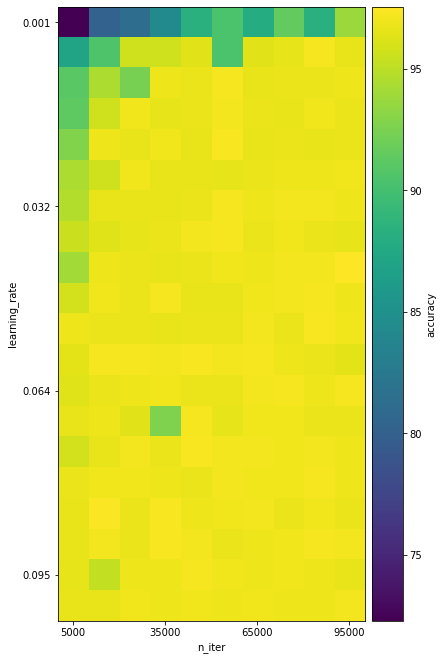

In [44]:
fig, ax = plt.subplots(1, figsize=(16, 9))
divider = make_axes_locatable(ax)
ax_cb = divider.append_axes("right", size="10%", pad=0.1)
p = ax.imshow(accuracies_matrix)
cb_temp = p.axes.figure.colorbar(p, cax=ax_cb)
x_indexes = range(0, len(n_iterations_array), int(len(n_iterations_array)/3))
y_indexes = range(0, len(learning_rates_array), int(len(learning_rates_array)/3))
ax.set_xticks(x_indexes)
ax.set_yticks(y_indexes)
ax.set_xticklabels([n_iterations_array[i] for i in x_indexes])
ax.set_yticklabels([round(learning_rates_array[i], 3) for i in y_indexes])
ax.set_xlabel('n_iter')
ax.set_ylabel('learning_rate')
ax_cb.set_ylabel('accuracy')
fig.tight_layout(pad=0.1)
plt.show()

Точность растет при увеличении числа итераций при не слишком маленьким learning_rate.